# Scraping Capitol Trades


## Import Modules

In [329]:
import pandas as pd  # For handling data in DataFrame
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### Set Up Paths

In [330]:
home_path = os.getcwd()
home_path = os.path.dirname(home_path)
home_path += "\\"

data_path = home_path + "02 Data Files\\"

print(data_path)

c:\Users\rjrul\OneDrive - University of Iowa\00 Current Semester\01 BAIS 3250 - Data Wrangling\05 Final Project\02 Data Files\


## Import Data

In [331]:
df = pd.read_csv(data_path+"04 YFinance\\"+"trade_comparison_yfinance.csv")

df

Name Ticker       Party Chamber State   Buy Date  Sell Date  \
0      Bill Keating   ABNB    Democrat   House    MA  2023-1-17  2024-5-16   
1      Bill Keating     BA    Democrat   House    MA  2023-9-14   2024-2-7   
2      Bill Keating    BAC    Democrat   House    MA  2024-1-17  2024-9-10   
3      Bill Keating     GM    Democrat   House    MA  2023-6-26  2024-9-10   
4      Bill Keating  GOOGL    Democrat   House    MA  2023-2-12  2024-5-16   
...             ...    ...         ...     ...   ...        ...        ...   
1351  Virginia Foxx   FLNG  Republican   House    NC   2023-1-3  2024-12-5   
1352  Virginia Foxx     MO  Republican   House    NC  2023-1-16   2024-1-9   
1353  Virginia Foxx    PAA  Republican   House    NC  2023-3-23  2023-10-2   
1354  Virginia Foxx      T  Republican   House    NC  2023-1-31  2024-12-5   
1355  Virginia Foxx    TAK  Republican   House    NC  2023-2-15  2023-8-28   

       Buy Price  Sell Price  Trade Return %  Market Buy Price  \
0      99.915001  147.190002       47.315219       3999.280029   
1     209.139999  211.919998        1.329253       4487.779785   
2      30.738856   38.817738       26.282310       4739.129883   
3      35.371884   44.605568       26.104586       4344.839844   
4      94.995828  173.351212       82.482973       4068.919922   
...          ...         ...             ...               ...   
1351   26.912435   22.639999      -15.875322       3853.290039   
1352   37.561198   37.866795        0.813598       3960.600098   
1353   10.383142   13.596812       30.950851       3959.209961   
1354   17.820059   23.531321       32.049620       4020.850098   
1355   15.690000   15.280000       -2.613128       4119.500000   

      Market Sell Price  Market Return %  Overperformance %  
0           5297.100098        32.451343          14.863876  
1           4995.060059        11.303591          -9.974338  
2           5495.520020        15.960528          10.321783  
3           5495.520020        26.483834          -0.379248  
4           5297.100098        30.184427          52.298546  
...                 ...              ...                ...  
1351        6075.109863        57.660332         -73.535654  
1352        4756.500000        20.095437         -19.281839  
1353        4288.390137         8.314289          22.636562  
1354        6075.109863        51.090185         -19.040565  
1355        4433.310059         7.617673         -10.230802  

[1356 rows x 14 columns]

In [332]:
df['Buy Date'] = pd.to_datetime(df['Buy Date'])
df['Sell Date'] = pd.to_datetime(df['Sell Date'])

df["Days Held"] = np.where((df['Sell Date'] - df['Buy Date']).dt.days < 0, 0, (df['Sell Date'] - df['Buy Date']).dt.days)

df

Name Ticker       Party Chamber State   Buy Date  Sell Date  \
0      Bill Keating   ABNB    Democrat   House    MA 2023-01-17 2024-05-16   
1      Bill Keating     BA    Democrat   House    MA 2023-09-14 2024-02-07   
2      Bill Keating    BAC    Democrat   House    MA 2024-01-17 2024-09-10   
3      Bill Keating     GM    Democrat   House    MA 2023-06-26 2024-09-10   
4      Bill Keating  GOOGL    Democrat   House    MA 2023-02-12 2024-05-16   
...             ...    ...         ...     ...   ...        ...        ...   
1351  Virginia Foxx   FLNG  Republican   House    NC 2023-01-03 2024-12-05   
1352  Virginia Foxx     MO  Republican   House    NC 2023-01-16 2024-01-09   
1353  Virginia Foxx    PAA  Republican   House    NC 2023-03-23 2023-10-02   
1354  Virginia Foxx      T  Republican   House    NC 2023-01-31 2024-12-05   
1355  Virginia Foxx    TAK  Republican   House    NC 2023-02-15 2023-08-28   

       Buy Price  Sell Price  Trade Return %  Market Buy Price  \
0      99.915001  147.190002       47.315219       3999.280029   
1     209.139999  211.919998        1.329253       4487.779785   
2      30.738856   38.817738       26.282310       4739.129883   
3      35.371884   44.605568       26.104586       4344.839844   
4      94.995828  173.351212       82.482973       4068.919922   
...          ...         ...             ...               ...   
1351   26.912435   22.639999      -15.875322       3853.290039   
1352   37.561198   37.866795        0.813598       3960.600098   
1353   10.383142   13.596812       30.950851       3959.209961   
1354   17.820059   23.531321       32.049620       4020.850098   
1355   15.690000   15.280000       -2.613128       4119.500000   

      Market Sell Price  Market Return %  Overperformance %  Days Held  
0           5297.100098        32.451343          14.863876        485  
1           4995.060059        11.303591          -9.974338        146  
2           5495.520020        15.960528          10.321783        237  
3           5495.520020        26.483834          -0.379248        442  
4           5297.100098        30.184427          52.298546        459  
...                 ...              ...                ...        ...  
1351        6075.109863        57.660332         -73.535654        702  
1352        4756.500000        20.095437         -19.281839        358  
1353        4288.390137         8.314289          22.636562        193  
1354        6075.109863        51.090185         -19.040565        674  
1355        4433.310059         7.617673         -10.230802        194  

[1356 rows x 15 columns]

## Univariate

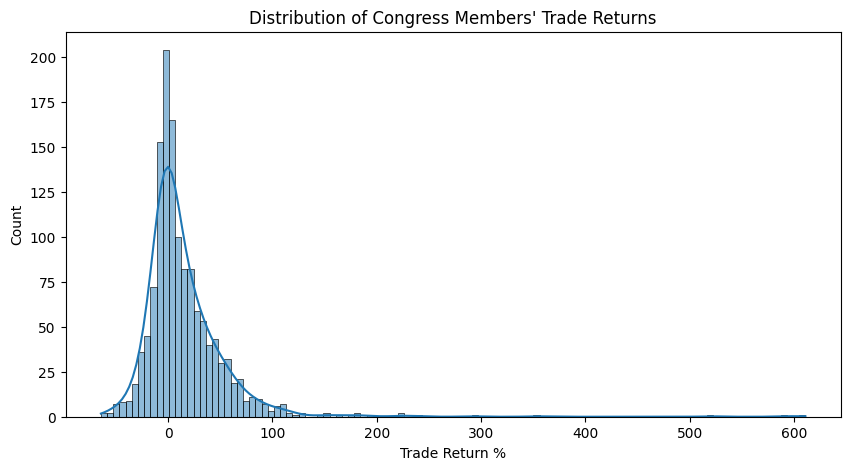

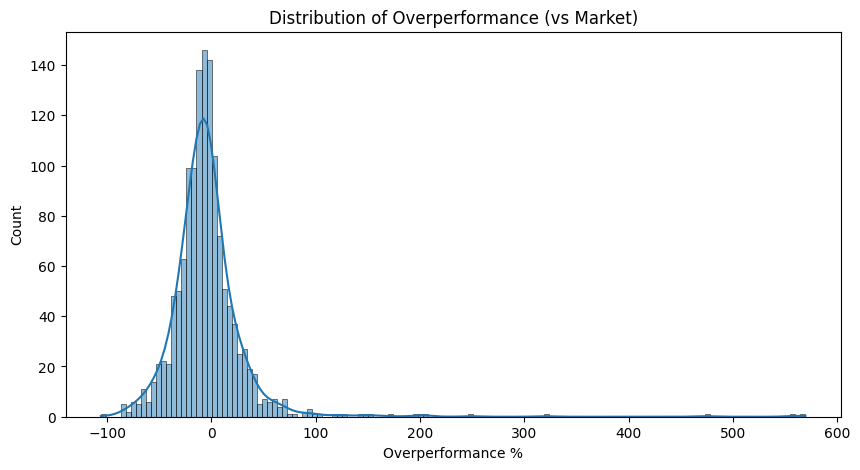

In [333]:
# Quick look at distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Trade Return %'], kde=True)
plt.title('Distribution of Congress Members\' Trade Returns')
plt.xlabel('Trade Return %')
plt.savefig(data_path+"05 Analysis\\01 Graphs\\"+'Distribution_of_Returns.png', dpi=300)
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['Overperformance %'], kde=True)
plt.title('Distribution of Overperformance (vs Market)')
plt.xlabel('Overperformance %')
plt.savefig(data_path+"05 Analysis\\01 Graphs\\"+'Distribution_Of_Overperformance.png', dpi=300)
plt.show()

In [334]:
df["Trade Return %"].describe()

count    1356.000000
mean       15.381012
std        43.785024
min       -64.497670
25%        -5.537237
50%         4.962183
75%        27.510816
max       610.853201
Name: Trade Return %, dtype: float64

In [335]:
df["Overperformance %"].describe()

count    1355.000000
mean       -4.039460
std        40.507125
min      -105.954546
25%       -20.918172
50%        -7.151286
75%         5.779736
max       569.396325
Name: Overperformance %, dtype: float64

## Bivariate

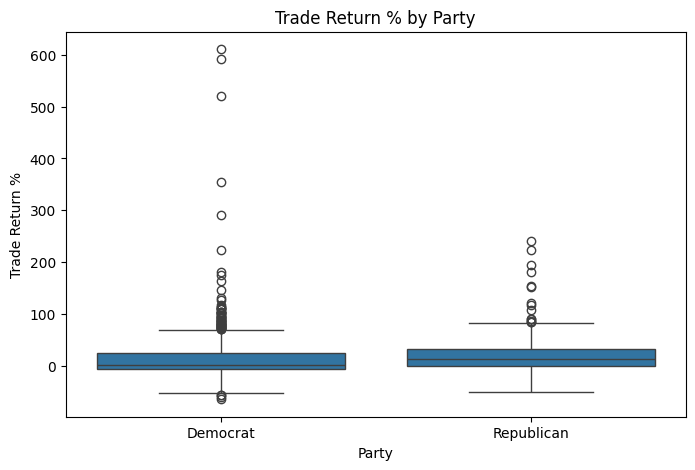

In [336]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Party', y='Trade Return %', data=df)
plt.title('Trade Return % by Party')
plt.savefig(data_path+"05 Analysis\\01 Graphs\\"+'Trade_Return_by_Party.png', dpi=300)
plt.show()

## Hypothesis Test

In [337]:
def test_run(data1, data2=0, type="T1samp", tests=["Greater", "Less", "Different"]):
    testdict = {}
    alts = ['greater', 'less', 'two-sided']
    n = -1
    for i, test in enumerate(tests):
        n += 1
        trialdict = {}
        if type == "T1samp":
            t_stat, p_value = stats.ttest_1samp(data1, data2, alternative=alts[i])
        elif type == "TInd":
            t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False, alternative=alts[i])
        else: return None
        result = .05 > p_value
        trialdict['Test'] = test
        trialdict['P_Val'] = p_value
        trialdict["Result"] = result
        testdict[n] = trialdict
    result_df = pd.DataFrame.from_dict(testdict, orient='Index').reset_index(drop=True)
    return result_df

In [338]:
tests = ["Congress members' returns overperform the market at a statistically significant level", 
         "Congress members' returns underperform the market at a statistically significant level", 
         "Congress members' returns perform differently than the market at a statistically significant level"]

results_market = test_run(df['Overperformance %'].dropna(), type="T1samp", tests=tests)

In [339]:
tests = ["Democrat Congress Members outperform Republican Congress Members in the stock market at a statistically significant level.",
         "Democrat Congress Members underperform Republican Congress Members in the stock market at a statistically significant level.",
         "Democrat Congress Members's returns are different than Republican Congress Members' returns in the stock market at a statistically significant level."]

dfsub = df.dropna(subset=['Trade Return %', 'Party'])

dems = dfsub[dfsub['Party'] == 'Democrat']['Trade Return %']
reps = dfsub[dfsub['Party'] == 'Republican']['Trade Return %']

results_party = test_run(dems, reps, type='TInd', tests=tests)

In [340]:
results = pd.concat([results_market,results_party]).reset_index(drop=True)

results.to_csv(data_path+"05 Analysis\\"+"hypothesis_test_results.csv", index=False)

results

Test     P_Val  Result
0  Congress members' returns overperform the mark...  0.999874   False
1  Congress members' returns underperform the mar...  0.000126    True
2  Congress members' returns perform differently ...  0.000251    True
3  Democrat Congress Members outperform Republica...  0.995274   False
4  Democrat Congress Members underperform Republi...  0.004726    True
5  Democrat Congress Members's returns are differ...  0.009452    True

## Machine Learning

In [341]:
df['Overperformed'] = (df['Overperformance %'] > 0).astype(int)

X = pd.get_dummies(df[['Party', 'Chamber', "State"]], drop_first=True)
X['Days Held'] = df['Days Held']
y = df['Overperformed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred,zero_division=0,output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv(data_path+"05 Analysis\\"+"ML_overperform_random_forest_classification_report.csv", index=True)
display(report_df)

precision    recall  f1-score     support
0              0.675676  0.862069  0.757576  174.000000
1              0.520000  0.265306  0.351351   98.000000
accuracy       0.647059  0.647059  0.647059    0.647059
macro avg      0.597838  0.563688  0.554464  272.000000
weighted avg   0.619587  0.647059  0.611215  272.000000

In [342]:
df.dtypes

Name                         object
Ticker                       object
Party                        object
Chamber                      object
State                        object
Buy Date             datetime64[ns]
Sell Date            datetime64[ns]
Buy Price                   float64
Sell Price                  float64
Trade Return %              float64
Market Buy Price            float64
Market Sell Price           float64
Market Return %             float64
Overperformance %           float64
Days Held                     int64
Overperformed                 int64
dtype: object